미로에 대한 환경 정의

In [26]:
class Enviroment:
    # 1. 미로 밖(절벽), 길, 목적지와 보상 설정
    # road의 값이 -인 이유는 goal과의 값 격차를 크게해서 
    # 최단거리를 경험, 학습 할 수 있게 하기 위함이다
    ciff = -3
    road = -1
    goal = 1
    
    # 2. 목적지 좌표 설정
    goal_position= [2,2]
    
    # 3. 보상 리스트 숫자
    
    reward_list = [[road, road, road],
                  [road, road, road],
                  [road, road, goal]]
    
    # 4. 보상 리스트 문자
    reward_list1 = [["road", "road", "road"],
                   ["road","road","road"],
                   ["road", "road", "goal"]]
    
    # 5. 보상 리스트를 array로 설정
    
    def __init__(self):
        self.reward = np.asarray(self.reward_list)
        

    # 6. 선택된 에이전트의 행동 결과 반환(미로 밖일 경우 이전 좌표로 다시 복귀)
    
    def move(self, agent, action):
        done = False
        
        # 6.1 행동에 따른 좌표 구하기
        # 현재 좌표 : agent.pos
        # 이동 후 좌표 : new_pos
        new_pos = agent.pos + agent.action[action]
        
        # 6.2 현재 좌표가 목적지인지 확인
        
        if self.reward_list1[agent.pos[0]][agent.pos[1]] == "goal":
            reward = self.goal
            observation = agent.set_pos(agent.pos)
            done = True
            
        # 6.3 이동 후 좌표가 미로 밖인지 확인
        # reward.shape[0] 과 [1]의 값은 배열의 크기인 3이다.
        
        
        elif new_pos[0] < 0 or new_pos[0] >= self.reward.shape[0] \
            or new_pos[1]  < 0 or new_pos[1] >= self.reward.shape[1]:
            reward = self.ciff
            observation = agent.set_pos(agent.pos)
            done = True
            
        else:
            observation = agent.set_pos(new_pos)
            reward = self.reward[observation[0],observation[1]]
            
        return observation, reward, done
             
        
                             
    
    

Agent 구현

In [27]:
import numpy as np

class Agent:
    # 1. 행동에 따른 에이전트의 좌표 이동(위, 오른쪽, 아래, 왼쪽)
    action = np.array([[-1,0], [0,1], [1,0], [0,-1]])
    
    # 2. 각 행동별 선택 확률
    
    select_action_pr = np.array([0.25, 0.25, 0.25, 0.25])
    
    # 3. 에이전트의 초기 위치 저장
    def __init__(self, initial_position):
        self.pos = initial_position
        
    # 4. 에이전트의 위치 저장
    def set_pos(self,position):
        self.pos = position
        return self.pos
        
    # 5. 에이전트의 위치 불러오기
    
    def get_pos(self):
        return self.pos

상태, 행동 가치 함수 정의

In [28]:

# 상태 가치 계산

def state_value_function(env, agent, G, max_step, now_step):
    
    # 1. 감가율 설정
    # 값이 1에 가까울 수록 미래를 더 중점으로 생각
    # 환경이 복잡할 수록 값을 작게 변화해가며 실행
    gamma = 0.9
    
    # 2. 현재 위치가 도착지점인지 확인
    if env.reward_list1[agent.pos[0]][agent.pos[1]] == "goal":
        return env.goal
    
    # 3. 마지막 상태는 보상만 계산
    
    if (max_step == now_step):
        pos1 = agent.get_pos()
    
        # 3.1 가능한 모든 행동의 보상을 계산

        for i in range(len(agent.action)):
            agent.set_pos(pos1)
            observation, reward, done = env.move(agent,i)
            G += agent.select_action_pr[i]* reward
        return G
    
    else:
        
        # 4.1 현재 위치 저장
        pos1 = agent.get_pos()
        
        # 4.2 현재 위치에서 가능한 모든 행동을 조사한 후 이동
        for i in range(len(agent.action)):
            observation, reward, done = env.move(agent, i)
            
        # 4.2.1 현재 상태에서 보상을 계산
        G += agent.select_action_pr[i] * reward
        
        # 4.2.2 이동 후 위치 확인 : 미로 밖, 벽, 구멍인 경우 이동 전 좌표로 다시 이동
        if done == True:
            if observation[0] < 0 or observation[0] >= env.reward.shape[0] or observation[1] < 0 or observation[1] >= env.reward.shape[1]:
                # 다시 복귀
                agent.set_pos(pos1)
        # 4.2.3 다음 step을 계산
        next_v = state_value_function(env, agent, 0, max_step, now_step+1)
        G += agent.select_action_pr[i] * gamma * next_v
        
        # 4.2.4 현재 위치를 복구
        agent.set_pos(pos1)
        
    return G
        

직접 실행해보기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


max_step_number = 0 total_time =0.0(s)
max_step_number = 1 total_time =0.0(s)
max_step_number = 2 total_time =0.0(s)
max_step_number = 3 total_time =0.0(s)
max_step_number = 4 total_time =0.0(s)
max_step_number = 5 total_time =0.0(s)
max_step_number = 6 total_time =0.0(s)
max_step_number = 7 total_time =0.0(s)
max_step_number = 8 total_time =0.0(s)
max_step_number = 9 total_time =0.01(s)
max_step_number = 10 total_time =0.0(s)
max_step_number = 11 total_time =0.01(s)
max_step_number = 12 total_time =0.0(s)


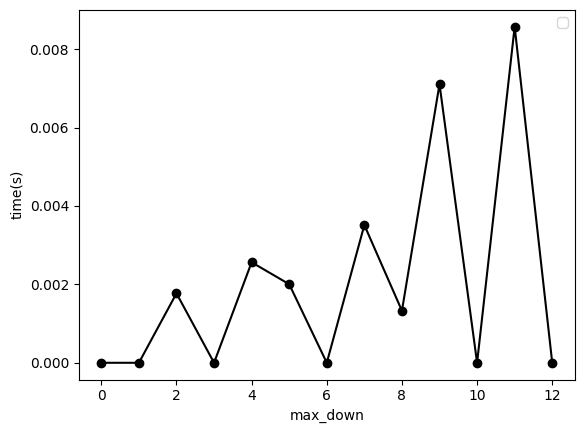

In [29]:
import time
import matplotlib.pyplot as plt
# 1. 환경 초기화
env = Enviroment()

# 2. 에이전트 초기화
agent = Agent(0.9)

# 3. 최대max_step_number 제한
max_step_number = 13

# 4. 계산 시간 저장을 위한 list
time_len =[]

# 5. 재귀함수 state_value_function을 이용해 각 상태 가치를 계산
for max_step in range(max_step_number):
    
    # 5.1 미로의 각 상태의 가치를 테이블 형식으로 저장
    v_table = np.zeros((env.reward.shape[0], env.reward.shape[1]))
    start_time = time.time()
    
    # 5.2 미로의 각 상태에 대해 state_value_function을 이용해 가치를 계산한 후 테이블 형식으로 저장
    for i in range(env.reward.shape[0]):
        for j in range(env.reward.shape[1]):
            agent.set_pos([i,j])
            v_table[i,j] =state_value_function(env, agent, 0, max_step, 0)
            
    # 5.3 max_step에따른 계산 시간 저장
    time_len.append(time.time()-start_time)
    print("max_step_number = {} total_time ={}(s)".format(max_step, np.round(time.time() -start_time,2)))
    #show_v_table(np.round(v_table,2),env)
    
# 6. step별 계산 시간 그래프 그리기
plt.plot(time_len, 'o-k')
plt.xlabel('max_down')
plt.ylabel('time(s)')
plt.legend()
plt.show()
    